# 06 - Model Training

Model Training: MultinomialNB, LinearSVC+SMOTE, RandomForest, SVM, LogisticRegression
Evaluates all models and saves them for deployment.

## Imports


In [28]:
import os
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Ensure directories exist and Load Dataset

In [3]:
os.makedirs("../models/final", exist_ok=True)
os.makedirs("../reports", exist_ok=True)

# Path
CLEANED_OUTPUT_LABELED_PATH = Path("../data/netflix_reviews_Cleaned.csv")

# Load
df = pd.read_csv(CLEANED_OUTPUT_LABELED_PATH)
print(f"✅ Loaded Cleaned_labeled dataset with {len(df)} rows")

✅ Loaded Cleaned_labeled dataset with 41238 rows


## Encode target

In [4]:
from sklearn.preprocessing import LabelEncoder
le = joblib.load("../models/processed/label_encoder.joblib")
df['sentiment_encoded'] = le.transform(df['sentiment_combined'])

X = df['clean_review']
y = df['sentiment_encoded']


## Split dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Load TF-IDF vectorizer

In [6]:
tfidf = joblib.load("../models/processed/tfidf_vectorizer.joblib")

## Model 1 - MultinomialNB 

In [9]:
# Create the pipline with MultinomialNB
pipeline_nb = Pipeline([
    ('tfidf', tfidf),
    ('clf', MultinomialNB(class_prior=[0.33, 0.33, 0.34]))  # example priors
])


In [12]:
# Train the model
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('clf', MultinomialNB(class_prior=[0.33, 0.33, 0.34]))])

In [13]:
# Make predictions
y_pred_nb = pipeline_nb.predict(X_test)

In [14]:
# Evaluate
print("=== MultinomialNB ===")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

=== MultinomialNB ===
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2916
           1       0.65      0.72      0.68      1386
           2       0.91      0.88      0.89      3946

    accuracy                           0.85      8248
   macro avg       0.81      0.82      0.81      8248
weighted avg       0.85      0.85      0.85      8248

Confusion Matrix:
 [[2538  226  152]
 [ 208  993  185]
 [ 176  309 3461]]


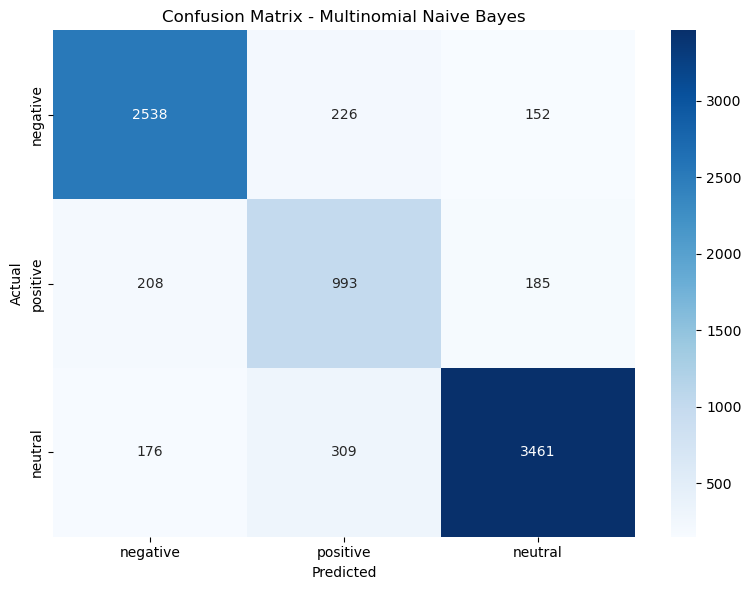

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['sentiment_combined'].unique(),
            yticklabels=df['sentiment_combined'].unique())
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig(f"../assets/confusion_matrix_multinomialNB.png")
plt.show()

In [23]:
# Save the model
joblib.dump(pipeline_nb, "../models/final/MultinomialNB.joblib")

['../models/final/MultinomialNB.joblib']

## Model 2 - LinearSVC + SMOTE

In [29]:
# Create pipeline with LinearSVC and SMOTE
pipeline_svc = ImbPipeline([
    ('tfidf', tfidf),
    ('smote', SMOTE(random_state=42)),
    ('clf', LinearSVC(class_weight='balanced', max_iter=5000))
])

In [30]:
# Train model
pipeline_svc.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
                ('smote', SMOTE(random_state=42)),
                ('clf', LinearSVC(class_weight='balanced', max_iter=5000))])

In [32]:
# Make Predictions
y_pred_svc = pipeline_svc.predict(X_test)

In [34]:
# Evaluate
print("=== LinearSVC + SMOTE ===")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

=== LinearSVC + SMOTE ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2916
           1       0.77      0.88      0.82      1386
           2       0.97      0.93      0.95      3946

    accuracy                           0.93      8248
   macro avg       0.90      0.92      0.91      8248
weighted avg       0.93      0.93      0.93      8248

[[2759  128   29]
 [  79 1216   91]
 [  54  234 3658]]


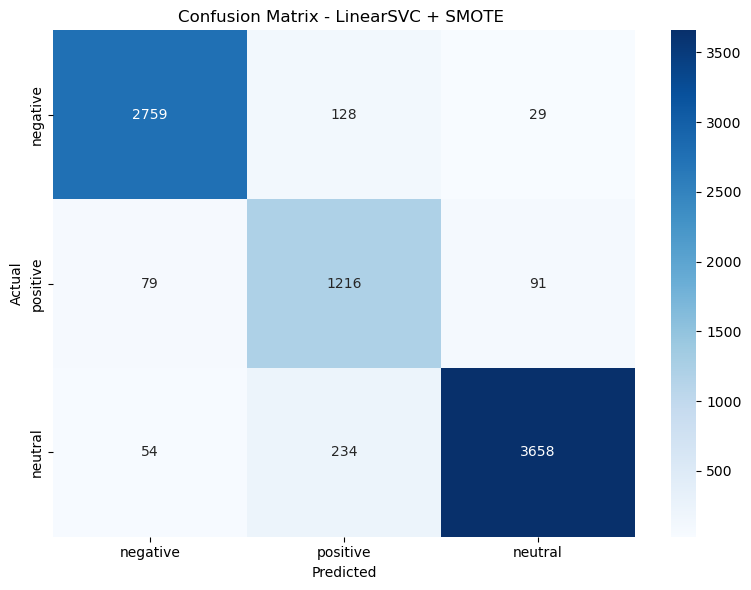

In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=df['sentiment_combined'].unique(),
            yticklabels=df['sentiment_combined'].unique())
plt.title("Confusion Matrix - LinearSVC + SMOTE ")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig(f"../assets/confusion_matrix_LinearSVC + SMOTE.png")
plt.show()

In [36]:
# Save the model 
joblib.dump(pipeline_svc, "../models/final/LinearSVC_SMOTE.joblib")


['../models/final/LinearSVC_SMOTE.joblib']

## Model 3 - LinearSVC + SMOTE